In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

In [5]:
bank = pd.read_csv("C:\\Users\\Admin\\Downloads\\bank-full.csv",sep=";")

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank_new=pd.get_dummies(bank,columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'],drop_first=True)


In [8]:
bank_new.shape

(45211, 43)

In [9]:
bank_new.isnull().sum()


age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0


In [10]:
bank_new.describe() 

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.215257,0.032890,0.027427,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.411005,0.178351,0.163326,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


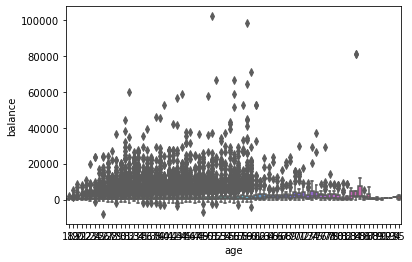

In [11]:
sns.boxplot(x="age",y="balance",data=bank_new,palette="hls") 

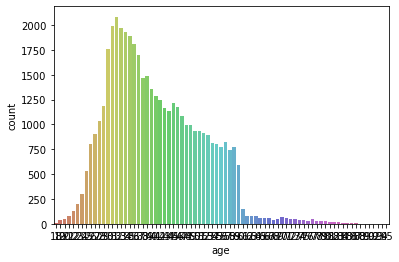

In [12]:
sns.countplot(x="age",data=bank_new,palette='hls')


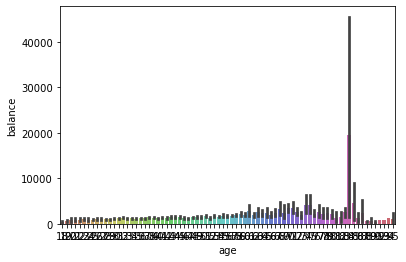

In [13]:
sns.barplot(x="age",y="balance",data=bank_new,palette='hls')


In [14]:
pd.crosstab(bank_new.age,bank_new.balance) 

balance,-8019,-6847,-4057,-3372,-3313,-3058,-2827,-2712,-2604,-2282,...,58544,58932,59649,64343,66653,66721,71188,81204,98417,102127
age,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(bank_new.age,bank_new.balance).plot(kind = 'bar') 

In [15]:
X=bank_new.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]]
Y=bank_new.iloc[:,42]

In [16]:
classifier=LogisticRegression()
classifier.fit(X,Y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
classifier.coef_

array([[-1.44508008e-02,  1.38734174e-05, -1.56854466e-02,
         3.79201166e-03, -3.14003682e-01,  2.22057482e-03,
        -1.72273685e-01, -2.89902985e-01, -3.14623253e-02,
        -1.10383769e-02,  7.47372684e-03,  1.90368646e-01,
        -1.86716606e-02, -1.00899237e-01,  3.63121429e-02,
        -7.80041343e-02,  3.13365903e-03,  2.68721249e-03,
        -2.01028811e-01, -1.37399607e-01, -3.04133561e-01,
         5.34258369e-02,  1.54616717e-02, -2.10890222e-02,
        -7.63235081e-01, -2.22181459e-01,  5.71037435e-02,
        -4.91472699e-01,  2.86162185e-02,  3.35018113e-02,
        -1.55002882e-02, -1.78944704e-02, -9.44294010e-02,
        -6.22045850e-02,  1.01535358e-01, -4.74196603e-01,
        -7.00122321e-02,  1.14414325e-01,  8.68137615e-02,
        -3.62273168e-02,  3.63054930e-01, -4.85276135e-01]])

In [18]:
classifier.predict_proba (X)

array([[0.94725908, 0.05274092],
       [0.97101962, 0.02898038],
       [0.97970373, 0.02029627],
       ...,
       [0.26400609, 0.73599391],
       [0.88357648, 0.11642352],
       [0.92129918, 0.07870082]])

In [19]:
y_pred=classifier.predict(X)
print(y_pred)
bank_new["y_pred"]=y_pred

[0 0 0 ... 1 0 0]


In [20]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([bank_new,y_prob],axis=1)
new_df 

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes,y_pred,0,1
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.947259,0.052741
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.971020,0.028980
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0.979704,0.020296
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,0.976206,0.023794
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.881990,0.118010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,1,0,0,0,0,1,1,1,0.339180,0.660820
45207,71,1729,17,456,2,-1,0,0,0,0,...,1,0,0,0,0,1,1,0,0.701653,0.298347
45208,72,5715,17,1127,5,184,3,0,0,0,...,1,0,0,0,1,0,1,1,0.264006,0.735994
45209,57,668,17,508,4,-1,0,1,0,0,...,1,0,0,0,0,1,0,0,0.883576,0.116424


In [21]:
confusion_matrix=confusion_matrix(Y,y_pred)
confusion_matrix

array([[39085,   837],
       [ 4062,  1227]], dtype=int64)

In [22]:
pd.crosstab(y_pred,Y) 

y_yes,0,1
row_0,,
0,39085,4062
1,837,1227


In [23]:
accuracy = sum(Y==y_pred)/bank_new.shape[0]
accuracy


0.8916414146999624

In [24]:
print (classification_report (Y, y_pred)) 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.59      0.23      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.61      0.64     45211
weighted avg       0.87      0.89      0.87     45211



In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score 

0.6055125205438182

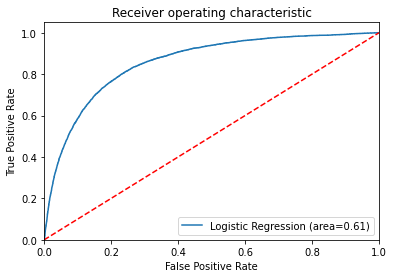

In [26]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [27]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1])

In [28]:
y_prob1

,0
0,0.052741
1,0.028980
2,0.020296
3,0.023794
4,0.118010
...,...
45206,0.660820
45207,0.298347
45208,0.735994
45209,0.116424


In [29]:
logit = sm.Logit(Y, X)

In [30]:
logit.fit().summary() 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_yes   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45169
Method:                           MLE   Df Model:                           41
Date:                Wed, 10 Mar 2021   Pseudo R-squ.:                     inf
Time:                        22:59:06   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0179      0.002     -9.901      0.000      -0.021      -0.014
balance              1.278e-05   5.19e-06      2.463      0.014    2.61e-06     2.3e-05
day                     0.0015      0.002      0.617      0.537      -0.003       0.006
duration                0.0041   6.42e-05     64.305      0.000       0.004       0.004
campaign               -0.0969      0.010     -9.384      0.000      -0.117      -0.077
pdays                  -0.0019      0.000     -6.564      0.000      -0.002      -0.001
previous                0.0003      0.008      0.037      0.970      -0.015       0.015
job_blue-collar        -0.5901      0.069     -8.614      0.000      -0.724      -0.456
job_entrepreneur       -0.5338      0.124     -4.322      0.000      -0.776      -0.292
job_housemaid          -0.7559      0.134     -5.653      0.000      -1.018      -0.494
job_management         -0.3360      0.071     -4.762      0.000      -0.474      -0.198
job_retired             0.2776      0.096      2.894      0.004       0.090       0.466
job_self-employed      -0.4844      0.110     -4.398      0.000      -0.700      -0.269
job_services           -0.4282      0.081     -5.269      0.000      -0.587      -0.269
job_student             0.0025      0.105      0.023      0.981      -0.203       0.208
job_technician         -0.3589      0.066     -5.439      0.000      -0.488      -0.230
job_unemployed         -0.3888      0.109     -3.559      0.000      -0.603      -0.175
job_unknown            -0.4630      0.232     -1.997      0.046      -0.918      -0.009
marital_married        -0.4349      0.054     -8.112      0.000      -0.540      -0.330
marital_single         -0.3037      0.059     -5.156      0.000      -0.419      -0.188
education_secondary    -0.1640      0.058     -2.853      0.004      -0.277      -0.051
education_tertiary      0.0211      0.069      0.307      0.759      -0.114       0.156
education_unknown      -0.0099      0.101     -0.098      0.922      -0.208       0.188
default_yes            -0.0204      0.163     -0.126      0.900      -0.339       0.298
housing_yes            -0.8038      0.043    -18.845      0.000      -0.887      -0.720
loan_yes               -0.4698      0.060     -7.864      0.000      -0.587      -0.353
contact_telephone      -0.0991      0.075     -1.327      0.185      -0.245       0.047
contact_unknown        -1.5449      0.072    -21.316      0.000      -1.687      -1.403
month_aug              -0.9307      0.075    -12.446      0.000      -1.077      -0.784
month_dec               0.4091      0.174      2.346      0.019       0.067       0.751
month_feb              -0.4984      0.084     -5.944      0.000      -0.663      -0.334
month_jan              -1.4588      0.120    -12.202      0.000      -1.693      -1.224
month_jul              -1.0497      0.074    -14.194      0.000      -1.195      -0.905
month_jun               0.1062      0.088      1.201      0.230      -0.0

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(Y,y_pred)

0.8916414146999624